In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load datasets
transactionData = pd.read_excel("/content/QVI_transaction_data.xlsx")
customerData = pd.read_csv("/content/QVI_purchase_behaviour.csv")

In [4]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [17]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [6]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### Transaction Data (`transactionData`):
- **264,836 rows** and **8 columns**.
- All columns are non-null, but the `DATE` field is in `int64` format and likely represents a serial date (Excel format).
- **Columns in the dataset**:
  1. `DATE`: The date of the transaction (Excel serial format, to be converted).
  2. `STORE_NBR`: Store number where the transaction occurred.
  3. `LYLTY_CARD_NBR`: Loyalty card number (used to identify customers).
  4. `TXN_ID`: Transaction ID.
  5. `PROD_NBR`: Product number.
  6. `PROD_NAME`: Product name (to be used for feature extraction like pack size and brand).
  7. `PROD_QTY`: Quantity of the product purchased.
  8. `TOT_SALES`: Total sales amount for the transaction.

### Purchase Behavior Data (`customerData`):
- **72,637 rows** and **3 columns**.
- No missing values, all columns are filled.
- **Columns in the dataset**:
  1. `LYLTY_CARD_NBR`: Loyalty card number (used for customer identification).
  2. `LIFESTAGE`: Describes the customer's life stage (e.g., whether they have children or not).
  3. `PREMIUM_CUSTOMER`: Whether the customer is categorized as a premium customer based on their purchasing behavior.

### Next Steps:
1. **Convert the `DATE` field** in `transactionData` to a `datetime` format.
2. **Feature extraction**: Extract **pack size** and **brand name** from the `PROD_NAME` column.
3. **Merge the datasets** on `LYLTY_CARD_NBR` to get customer-level information in one dataframe.



In [8]:
# Convert DATE column to datetime format
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin='1899-12-30', unit='D')

In [11]:
print(transactionData['DATE'].dtype)

datetime64[ns]


In [15]:
# Remove non-chip products (Example: salsa)
transactionData = transactionData[~transactionData['PROD_NAME'].str.contains("salsa", case=False)]

In [16]:
transactionData.describe().T

,count,mean,min,25%,50%,75%,max,std
DATE,246742,2018-12-30 01:19:01.211467520,2018-07-01 00:00:00,2018-09-30 00:00:00,2018-12-30 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,NaN
STORE_NBR,246742.0,135.051098,1.0,70.0,130.0,203.0,272.0,76.787096
LYLTY_CARD_NBR,246742.0,135530.984956,1000.0,70015.0,130367.0,203084.0,2373711.0,80715.280765
TXN_ID,246742.0,135131.098848,1.0,67569.25,135183.0,202653.75,2415841.0,78147.717692
PROD_NBR,246742.0,56.351789,1.0,26.0,53.0,87.0,114.0,33.695428
PROD_QTY,246742.0,1.908062,1.0,2.0,2.0,2.0,200.0,0.659831
TOT_SALES,246742.0,7.321322,1.7,5.8,7.4,8.8,650.0,3.077828


### **Transaction Data Summary**  

1️⃣ **Transaction Date Range:**  
- The transactions span from **July 1, 2018, to June 30, 2019**.   

2️⃣ **Store Distribution:**  
- There are **272 stores** (max `STORE_NBR` = 272).  
- The median store number is **130**, meaning stores are evenly distributed.  

3️⃣ **Loyalty Card Numbers (LYLTY_CARD_NBR):**  
- The customer IDs range from **1,000 to 2,373,711**, suggesting a broad customer base.    

4️⃣ **Transaction ID (TXN_ID):**  
- Transaction IDs are unique for each transaction (based on their values).

5️⃣ **Product Purchases (PROD_NBR):**  
- The dataset contains **114 unique products** (max PROD_NBR = 114).  
- The **median product ID is 53**, indicating balanced product distribution.  

6️⃣ **Product Quantity (PROD_QTY):**  
- The median purchase quantity is **2** per transaction.  
- The **maximum quantity is 200**, which could be an outlier (bulk purchase or data issue).  

7️⃣ **Total Sales (TOT_SALES):**  
- The **average spend per transaction is 7.32**, with most purchases between **5.80 and 8.80**.  
- The **maximum sale is 650**, which is significantly higher than the median, possibly indicating bulk purchases.  


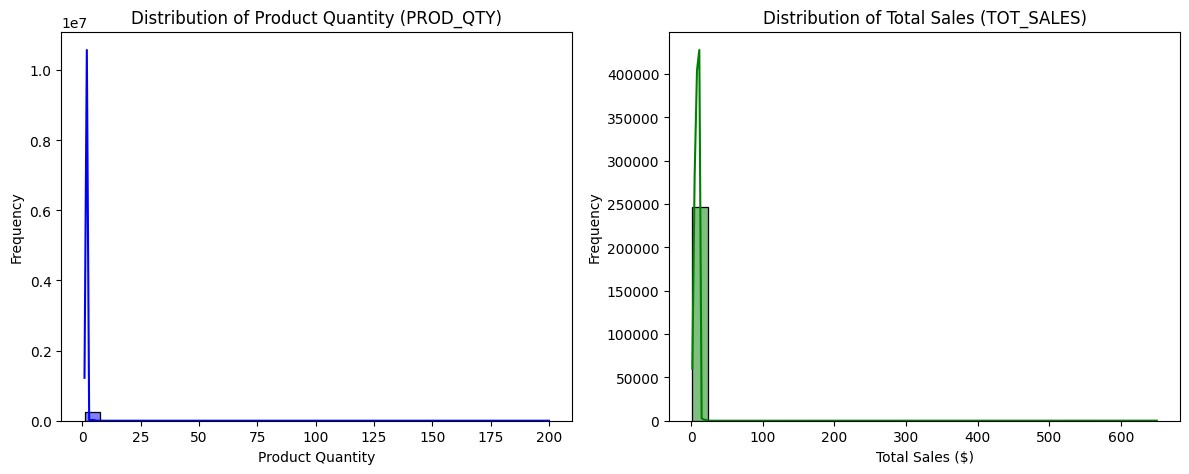

In [19]:
# Set figure size
plt.figure(figsize=(12, 5))

# Histogram for PROD_QTY
plt.subplot(1, 2, 1)
sns.histplot(transactionData['PROD_QTY'], bins=30, kde=True, color='blue')
plt.title("Distribution of Product Quantity (PROD_QTY)")
plt.xlabel("Product Quantity")
plt.ylabel("Frequency")

# Histogram for TOT_SALES
plt.subplot(1, 2, 2)
sns.histplot(transactionData['TOT_SALES'], bins=30, kde=True, color='green')
plt.title("Distribution of Total Sales (TOT_SALES)")
plt.xlabel("Total Sales ($)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


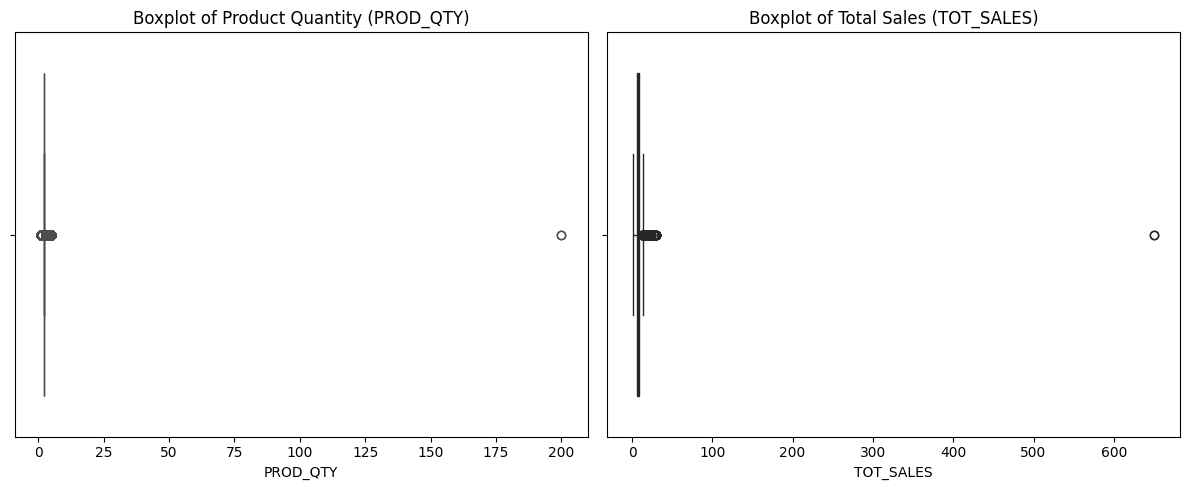

In [21]:
plt.figure(figsize=(12, 5))

# Boxplot for PROD_QTY
plt.subplot(1, 2, 1)
sns.boxplot(x=transactionData['PROD_QTY'], color='blue')
plt.title("Boxplot of Product Quantity (PROD_QTY)")

# Boxplot for TOT_SALES
plt.subplot(1, 2, 2)
sns.boxplot(x=transactionData['TOT_SALES'], color='green')
plt.title("Boxplot of Total Sales (TOT_SALES)")

plt.tight_layout()
plt.show()


In [22]:
# count outliers using IQR method
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Count outliers in PROD_QTY
qty_outliers, qty_lower, qty_upper = count_outliers(transactionData, "PROD_QTY")
print(f"PROD_QTY Outliers: {qty_outliers}, Lower Bound: {qty_lower}, Upper Bound: {qty_upper}")

# Count outliers in TOT_SALES
sales_outliers, sales_lower, sales_upper = count_outliers(transactionData, "TOT_SALES")
print(f"TOT_SALES Outliers: {sales_outliers}, Lower Bound: {sales_lower}, Upper Bound: {sales_upper}")


PROD_QTY Outliers: 26672, Lower Bound: 2.0, Upper Bound: 2.0
TOT_SALES Outliers: 669, Lower Bound: 1.299999999999998, Upper Bound: 13.300000000000002


### **Outlier Count:**  
1. **PROD_QTY:**  
   - The **lower and upper bound are both 2.0**, meaning **any quantity other than 2 is considered an outlier**.  
   - **26,672 transactions** have outlier values. This suggests most purchases are in packs of 2, while other quantities (e.g., 1, 3, or 200) are considered unusual.  

2. **TOT_SALES:**  
   - Sales below **1.30** or above **13.30** are outliers.  
   - **669 transactions** fall outside this range, likely due to premium-priced or bulk purchases.  


### **Reason for Keeping Outliers:**
The outliers in both `PROD_QTY` (product quantity) and `TOT_SALES` (total sales) reflect extreme values, such as large purchases or premium-priced items. In this retail analysis, these outliers may represent a **premium customer segment** that typically purchases in bulk or opts for higher-priced, premium chip products. Removing these values could exclude valuable insights into this segment's purchasing behavior, which could have a significant impact on the overall sales strategy.

Given that the objective is to understand different customer segments and their behaviors, retaining these outliers will allow for a more **comprehensive analysis** that accounts for both regular and premium customer purchases. This is crucial in making informed recommendations for targeting these premium segments in future strategies.

In [23]:
# Extract Pack Size
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [25]:
transactionData['PACK_SIZE'].sample(5)

,PACK_SIZE
142893,175.0
130267,175.0
223605,134.0
60403,150.0
257920,175.0


In [26]:
# Extract Brand Name
transactionData['BRAND'] = transactionData['PROD_NAME'].apply(lambda x: x.split(' ')[0].upper())

In [27]:
transactionData['BRAND'].sample(5)

,BRAND
197295,CHEETOS
170133,THINS
218247,SMITHS
58047,WW
193239,CHEETOS


In [28]:
# Standardize Brand Names
brand_mapping = {"RED": "RRD", "SNBTS": "SUNBITES", "INFZNS": "INFUZIONS", "WW": "WOOLWORTHS",
                 "SMITH": "SMITHS", "NCC": "NATURAL", "DORITO": "DORITOS", "GRAIN": "GRNWVES"}
transactionData['BRAND'] = transactionData['BRAND'].replace(brand_mapping)

In [29]:
transactionData['BRAND'].sample(5)

,BRAND
123205,SMITHS
167165,PRINGLES
105327,CHEEZELS
207469,WOOLWORTHS
193914,RRD


In [30]:
# Merge transaction and customer datasets
data = transactionData.merge(customerData, on='LYLTY_CARD_NBR', how='left')

In [31]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget


In [32]:
data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND,0


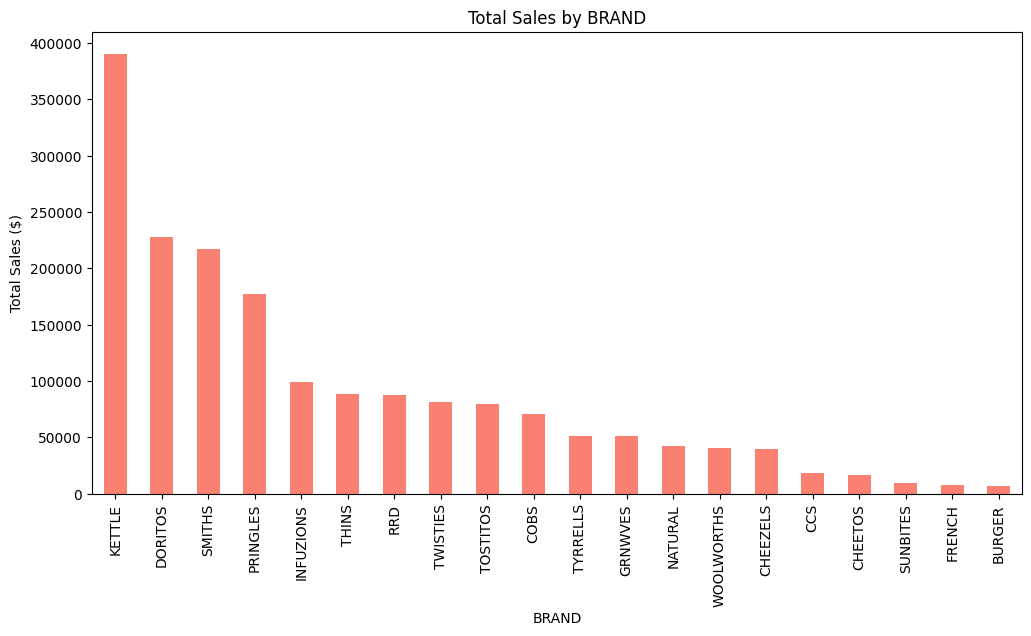

In [73]:
# Total sales by BRAND
sales_by_brand = data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sales_by_brand.plot(kind='bar', color='salmon')
plt.title('Total Sales by BRAND')
plt.ylabel('Total Sales ($)')
plt.xlabel('BRAND')
plt.xticks(rotation=90)
plt.show()


In [75]:
sales_by_brand

,TOT_SALES
BRAND,
KETTLE,390239.8
DORITOS,227629.9
SMITHS,217492.0
PRINGLES,177655.5
INFUZIONS,99047.6
THINS,88852.5
RRD,87607.5
TWISTIES,81522.1
TOSTITOS,79789.6


### **Insights from Total Sales by Brand**  

Total sales for all brands combined:  
**$2,548,374.1** (Sum of all total sales)


### **Key Observations**:
- **Kettle** leads with **15.3%** of the total sales, a significant share of the market.
- **Doritos** and **Smiths** follow closely with **8.9%** and **8.5%**, respectively.
- Other brands like **Pringles** and **Infuzions** hold **7.0%** and **3.9%**, indicating moderate popularity.
- Smaller brands such as **CCS**, **Cheetos**, **Sunbites**, **French** and **Burger** contribute a small fraction, under **1%** each, which suggests a limited market share.

This distribution helps to understand where the bulk of sales are coming from, focusing on the top three brands for marketing or promotional strategies.

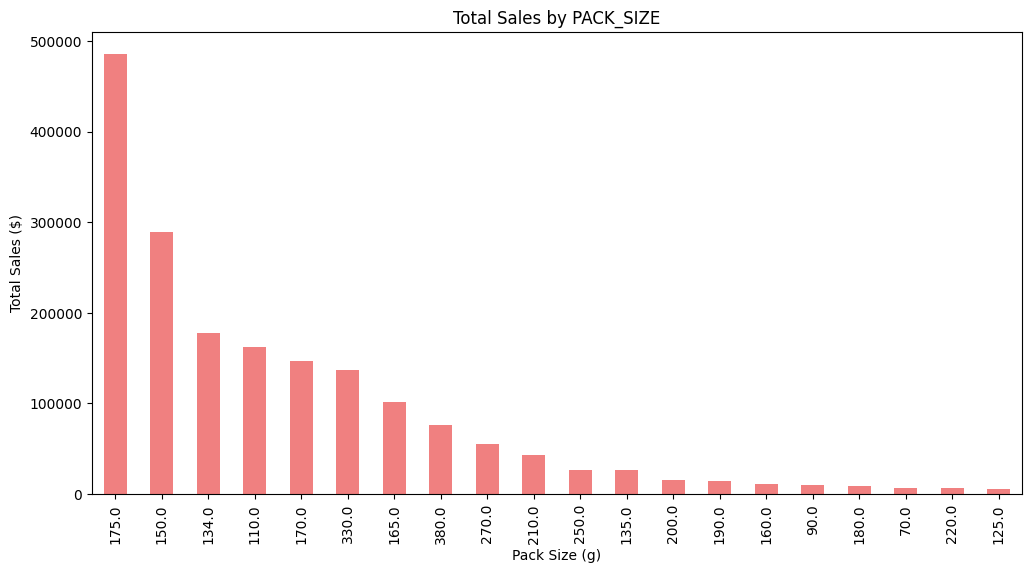

In [77]:
# Total sales by PACK_SIZE
sales_by_pack_size = data.groupby('PACK_SIZE')['TOT_SALES'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sales_by_pack_size.plot(kind='bar', color='lightcoral')
plt.title('Total Sales by PACK_SIZE')
plt.ylabel('Total Sales ($)')
plt.xlabel('Pack Size (g)')
plt.show()

### **Total Sales by Pack Size (in Percentage)**

Total sales for all pack sizes combined:  
**$2,548,374.1** (Sum of all total sales)

### **Key Observations**:
- **Pack Size 175** holds the largest share of total sales at **19.1%**, followed by **Pack Size 150** at **11.4%**.
- **Pack Sizes 134** and **110** contribute **7.0%** and **6.4%**, respectively.
- Smaller pack sizes such as **220**, **70**, and **125** have a minimal contribution to total sales, each at around **0.2%** to **0.3%**.

This indicates that larger pack sizes tend to dominate the sales, with smaller pack sizes making a relatively limited impact.

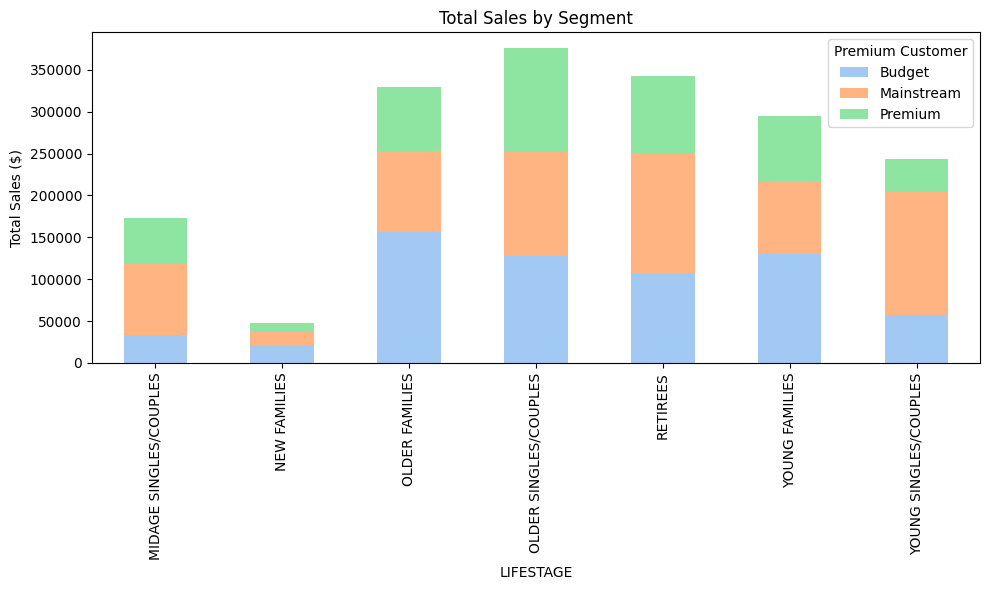

In [49]:
# Sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_pivot = data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum')

# Plotting the stacked bar chart with pastel colors
sales_pivot.plot(kind='bar', stacked=True, figsize=(10,6), color=sns.color_palette("pastel", n_colors=len(sales_pivot.columns)))

plt.title("Total Sales by Segment")
plt.xlabel("LIFESTAGE")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)
plt.legend(title='Premium Customer', labels=sales_pivot.columns)
plt.tight_layout()
plt.show()


In [44]:
sales_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,76542.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


### **Summary Insights (with Percentages):**

1. **Older Families** are the top contributors to total sales across all customer segments:
   - **Budget:** 156,863.75 (38.8%)
   - **Mainstream:** 96,413.55 (23.4%)
   - **Premium:** 76,542.60 (18.7%)

2. **Young Families** show strong sales in the **Budget** segment $129,717.95 (38.9%), but lower in **Mainstream** and **Premium**.

3. **Older Singles/Couples** have balanced sales across all segments:
   - **Budget:** 127,833.60 (29.7%)
   - **Mainstream:** 124,648.50 (29.3%)
   - **Premium:** 123,537.55 (29.1%)

4. **Retirees** show the highest contribution from **Mainstream** 145,168.95 (35.1%), followed by **Budget** and **Premium**.

5. **Midage Singles/Couples** contribute the most to **Mainstream** 84,734.25 (34.7%) and **Premium** 54,443.85 (22.5%).

6. **New Families** have the lowest sales, particularly in **Mainstream** $15,979.70 (4.4%) and **Premium** 10,760.8 (2.8%).

7. **Young Singles/Couples** favor **Mainstream** $147,582.20 (41.5%) and have lower sales in **Budget** 57,122.10 (15.5%) and **Premium** 39,052.30( 10.6%).

### **Key Takeaways:**
- **Older Families** are the highest spenders, especially in the **Budget** category.
- **Young Families** may need targeted promotions to boost sales in other segments.
- **Retirees** and **Older Singles/Couples** have diverse purchasing preferences, making them ideal targets for various product offerings.
- **New Families** have the least sales and could benefit from targeted marketing efforts.


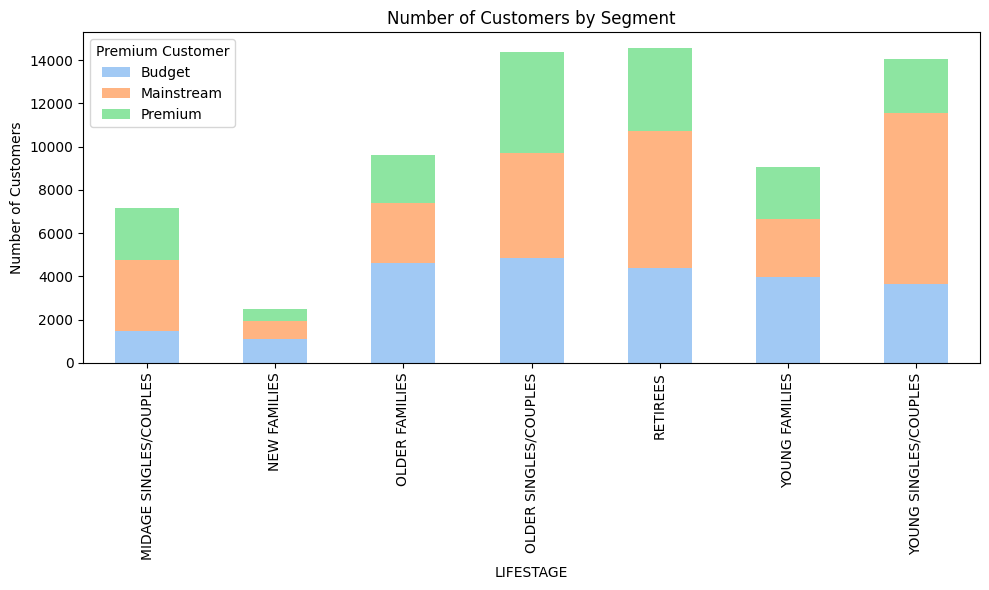

In [50]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers_pivot = data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR', aggfunc='nunique')

# Plotting the stacked bar chart with pastel colors
customers_pivot.plot(kind='bar', stacked=True, figsize=(10,6), color=sns.color_palette("pastel", n_colors=len(customers_pivot.columns)))

plt.title("Number of Customers by Segment")
plt.xlabel("LIFESTAGE")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.legend(title='Premium Customer', labels=customers_pivot.columns)
plt.tight_layout()
plt.show()


In [51]:
customers_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1474,3298,2369
NEW FAMILIES,1087,830,575
OLDER FAMILIES,4611,2788,2232
OLDER SINGLES/COUPLES,4849,4858,4682
RETIREES,4385,6358,3812
YOUNG FAMILIES,3953,2685,2398
YOUNG SINGLES/COUPLES,3647,7917,2480


### **Summary Insights (with Percentages):**

1. **Older Families** have the highest customer count, especially in the **Budget** 4,611 (34.5%) and **Mainstream** 2,788 (20.6%) segments.
2. **Young Singles/Couples** show strong preference for **Mainstream** 7,917 (50.3%), with fewer in **Budget** 3,647 (23.3%) and **Premium** 2,480 (16%).
3. **Retirees** have a balanced distribution, with the highest in **Mainstream** 6,358 (41.6%) followed by **Budget** 4,385 (29%) and **Premium** 3,812 (24.9%).
4. **Older Singles/Couples** show equal interest in all segments, especially **Budget** 4,849 (33.2%) and **Mainstream** 4,858 (33.2%).
5. **Midage Singles/Couples** favor **Mainstream** 3,298 (34.6%), with solid numbers in **Premium** 2,369 (24.7%) and **Budget** 1,474  (15.6%).
6. **Young Families** prefer **Budget** 3,953 (39.9%) and show fewer numbers in **Mainstream** 2,685 (27.2%) and **Premium** 2,398 (24.3%).
7. **New Families** have the lowest customer numbers, particularly in **Premium** 575 (4.1%), with **Budget** 1,087 (7.5%) and **Mainstream** 830, (5.7%).

### **Key Takeaways:**
- **Older Families** are the top segment, especially in **Budget** and **Mainstream**.
- **Young Singles/Couples** prefer **Mainstream**, while **Retirees** are spread across all segments.
- **New Families** may need special attention in the **Premium** category.

These percentages provide a clearer understanding of the customer distribution. Let me know if you'd like to dive deeper into any segment!

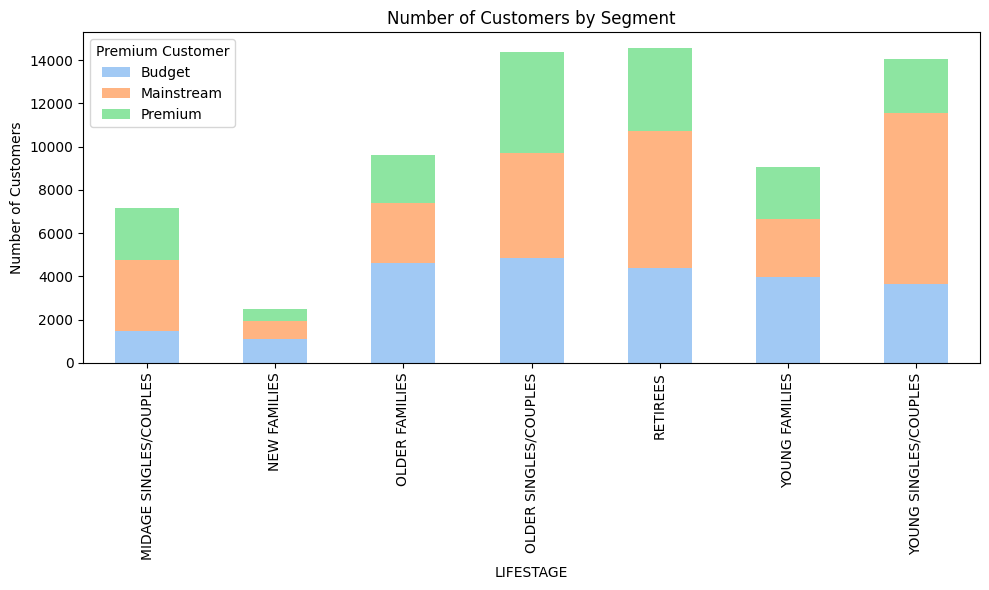

In [54]:
# Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers_pivot = data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR', aggfunc='nunique')

# Plotting the stacked bar chart with pastel colors
customers_pivot.plot(kind='bar', stacked=True, figsize=(10,6), color=sns.color_palette("pastel", n_colors=len(customers_pivot.columns)))

plt.title("Number of Customers by Segment")
plt.xlabel("LIFESTAGE")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)
plt.legend(title='Premium Customer', labels=customers_pivot.columns)
plt.tight_layout()
plt.show()


In [55]:
customers_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1474,3298,2369
NEW FAMILIES,1087,830,575
OLDER FAMILIES,4611,2788,2232
OLDER SINGLES/COUPLES,4849,4858,4682
RETIREES,4385,6358,3812
YOUNG FAMILIES,3953,2685,2398
YOUNG SINGLES/COUPLES,3647,7917,2480


### **Customer Distribution Insights**  

- **Young Singles/Couples** make up the largest segment, with **36%** in **Mainstream**, followed by **Budget (17%)** and **Premium (11%)**.  
- **Retirees** have a high **Mainstream** share (**32%**), while Budget and Premium contribute **22%** and **19%**, respectively.  
- **Older Singles/Couples** are evenly distributed across all three segments (**~33% each**).  
- **Older Families** lean towards the **Budget (38%)** segment, with **Mainstream (23%)** and **Premium (18%)** following.  
- **Midage Singles/Couples** show the highest **Mainstream** preference (**39%**), with Budget and Premium at **17%** and **14%**.  
- **New Families** have a lower customer base, with **Budget (41%)** being the most dominant, followed by **Mainstream (31%)** and **Premium (21%)**.  
- **Young Families** are more balanced, with **Budget (33%)**, **Mainstream (22%)**, and **Premium (20%)**.  


In [57]:
data.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

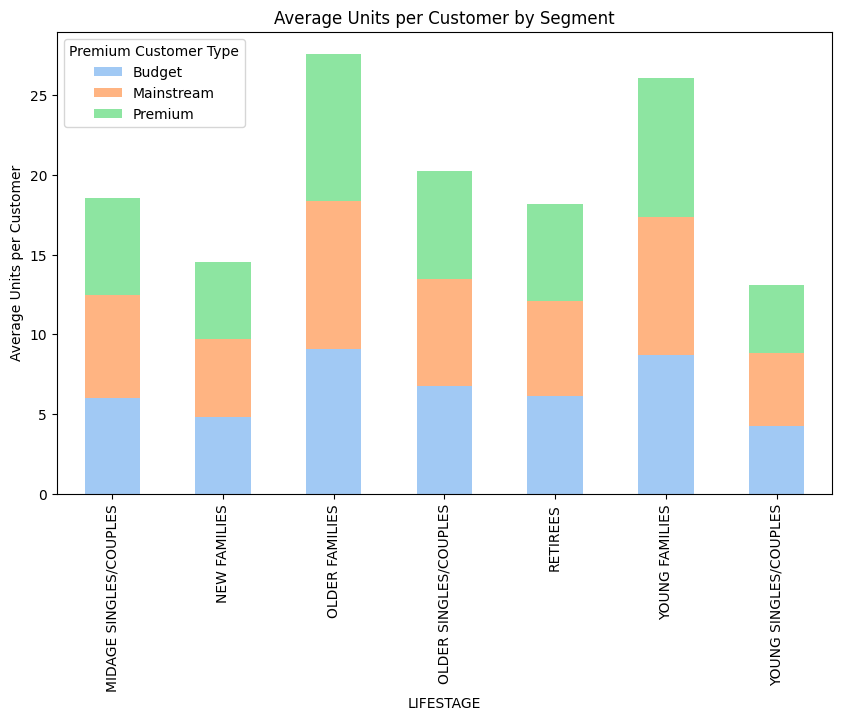

In [65]:
# Calculate average units per customer
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
avg_units = avg_units.reset_index().rename(columns={0: 'AVG_UNITS'})

# Pivot for stacked bar chart
avg_units_pivot = avg_units.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='AVG_UNITS')

# Plot stacked bar chart
avg_units_pivot.plot(kind='bar', stacked=True, color=sns.color_palette("pastel", n_colors=len(avg_units_pivot.columns)), figsize=(10, 6))
plt.xticks(rotation=90)
plt.ylabel("Average Units per Customer")
plt.title("Average Units per Customer by Segment")
plt.legend(title="Premium Customer Type")
plt.show()

In [66]:
avg_units_pivot

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,6.026459,6.432080,6.078514
NEW FAMILIES,4.821527,4.891566,4.815652
OLDER FAMILIES,9.076773,9.255380,9.246864
OLDER SINGLES/COUPLES,6.781398,6.712021,6.769543
RETIREES,6.141847,5.925920,6.103358
YOUNG FAMILIES,8.722995,8.638361,8.716013
YOUNG SINGLES/COUPLES,4.250069,4.575597,4.264113


### **Insights on Average Units per Customer**  
- **Older Families & Young Families** purchase the most chips, averaging around **9 units per customer** across all price segments.  
- **Midage Singles/Couples & Older Singles/Couples** buy around **6–7 units per customer**, with minimal variation between Budget, Mainstream, and Premium shoppers.  
- **Retirees** show slightly lower average purchases (**~6 units per customer**), with **Mainstream shoppers buying the least (5.93 units)** in this group.  
- **Young Singles/Couples & New Families** purchase the fewest chips (**~4–5 units per customer**), with **Mainstream buyers in this group purchasing slightly more.**  

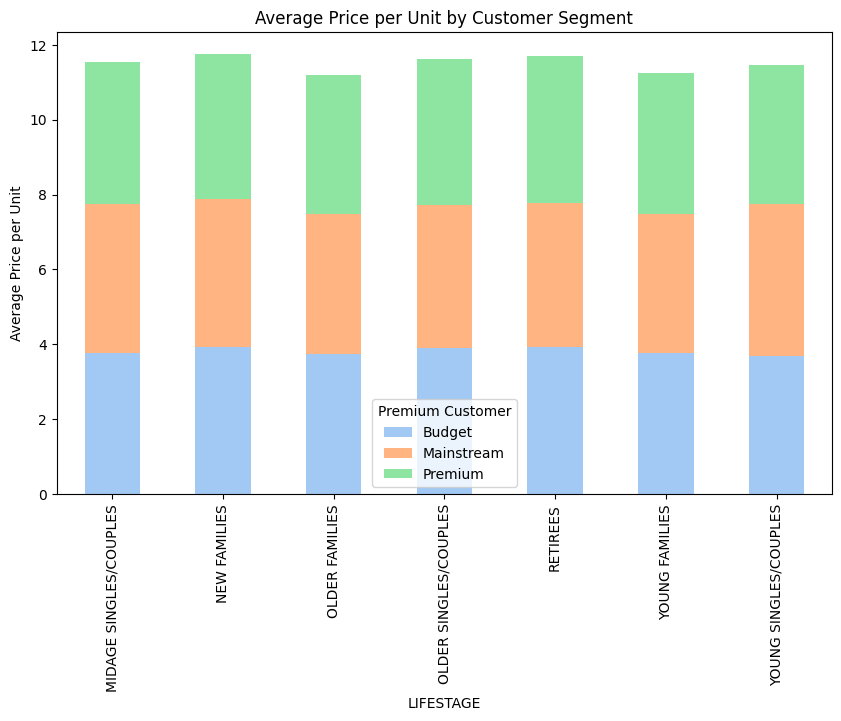

In [68]:
# Average price per unit by segment (stacked bar chart with pastel colors)
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
avg_price = avg_price.unstack()  # Convert to wide format for stacking

# Plot stacked bar chart
avg_price.plot(kind='bar', stacked=True, color=sns.color_palette("pastel", n_colors=len(avg_price.columns)), figsize=(10, 6))
plt.xticks(rotation=90)
plt.ylabel("Average Price per Unit")
plt.title("Average Price per Unit by Customer Segment")
plt.legend(title="Premium Customer")
plt.show()


In [69]:
avg_price

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.753878,3.994449,3.780823
NEW FAMILIES,3.931969,3.935887,3.886168
OLDER FAMILIES,3.747969,3.736380,3.708639
OLDER SINGLES/COUPLES,3.887529,3.822753,3.897698
RETIREES,3.932731,3.852986,3.924037
YOUNG FAMILIES,3.761903,3.722439,3.759232
YOUNG SINGLES/COUPLES,3.685297,4.074043,3.692889


### **Insights from Average Price per Unit by Segment**  

The average price per unit is similar across all segments, ranging between **3.70 and 4.07**, indicating consistent pricing. Slight variations suggest that **Mainstream Young Singles/Couples** might prefer **premium brands or smaller packs**, while **Older and Young Families** may buy in bulk, reducing per-unit costs.